# Import and Load Dataset 

In [1]:
import sys
sys.path.insert(0, 'C:/Users/enioh/Documents/Github/MMA-ML-Model')

import pandas as pd 
import numpy as np 

from os.path import abspath, dirname, join

df = pd.read_csv(abspath(join(dirname(abspath('')), 'data/', 'processed/', 'extracted_stats.csv')))

# Model Loading

In [2]:
from src.models.XGBoost_Model import make_model
from src.models.train_model import train_model
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

clf = make_model()
clf, split_data = train_model(clf, df)

X_train, y_train, X_test, y_test = split_data

C:\Users/enioh/Documents/Github/MMA-ML-Model\src\models\train_model.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  post_comp_cols = df.loc[:, ~df.columns.str.contains('precomp_([a-zA-Z_]+)_vs_opp', regex=True)].columns.to_list() # All columns that do not have the precomp_ id or vs_opp id


Model Training Accuracy: 0.8738527214514408
Model Test Accuracy: 0.6006825938566553


In [4]:
X_train

,precomp_height_prior_vs_opp,precomp_height_var_vs_opp,precomp_height_delta_vs_opp,precomp_reach_prior_vs_opp,precomp_knockdowns_prior_vs_opp,precomp_knockdowns_avg_vs_opp,precomp_knockdowns_windowavg_vs_opp,precomp_knockdowns_var_vs_opp,precomp_knockdowns_windowvar_vs_opp,precomp_knockdowns_peak_vs_opp,...,precomp_total_time_pM_differential_low_vs_opp,precomp_total_time_pM_differential_delta_vs_opp,precomp_elo_differential_prior_vs_opp,precomp_elo_differential_avg_vs_opp,precomp_elo_differential_windowavg_vs_opp,precomp_elo_differential_var_vs_opp,precomp_elo_differential_windowvar_vs_opp,precomp_elo_differential_peak_vs_opp,precomp_elo_differential_low_vs_opp,precomp_elo_differential_delta_vs_opp
6596,-1.0,0.0,0.0,-3.0,-1.0,-0.434211,0.000000,-0.160819,-5.551115e-17,0.0,...,0.0,0.0,0.046371,0.045861,0.025642,-0.001114,-0.008157,-0.013374,-0.009475,0.112696
8573,-1.0,0.0,0.0,1.0,0.0,-0.133333,0.000000,-0.133333,0.000000e+00,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.023416,-0.101987,NaN
7116,-4.0,0.0,0.0,-1.0,0.0,-0.023810,-0.333333,-0.778388,-1.000000e+00,0.0,...,0.0,0.0,-0.078886,-0.015909,-0.025492,0.004270,0.001845,0.051515,-0.135052,-0.044691
11924,-2.0,0.0,0.0,-4.0,0.0,-0.107143,0.000000,-0.071429,0.000000e+00,0.0,...,0.0,0.0,0.030646,0.022186,0.031930,-0.001084,-0.000013,0.004049,0.065548,-0.004160
4647,1.0,0.0,0.0,-1.0,-1.0,-0.142857,-0.333333,-0.142857,-3.333333e-01,-1.0,...,0.0,0.0,-0.090581,-0.066146,-0.119565,0.000337,-0.000398,-0.090581,-0.088524,0.000592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8160,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.0,0.0,0.091317,-0.016011,-0.041643,0.000308,0.002291,-0.036476,-0.027475,0.284715
8176,-1.0,0.0,0.0,-4.0,2.0,0.503759,0.666667,0.951546,2.666667e+00,1.0,...,0.0,0.0,-0.001424,0.026803,0.000092,-0.002779,-0.004869,-0.002748,0.072118,-0.059043
2055,-1.0,0.0,0.0,-2.0,0.0,0.076923,0.333333,0.192308,3.333333e-01,1.0,...,0.0,NaN,NaN,-0.069455,NaN,0.000358,NaN,-0.026402,-0.057588,NaN
4669,-4.0,0.0,0.0,-4.0,0.0,-0.064394,0.000000,-0.046080,0.000000e+00,0.0,...,0.0,0.0,0.166197,0.041734,0.120456,0.000595,0.003059,0.099674,-0.022466,0.200614


# Some PCA using the statsmodels package for Missing Values

In [5]:
from statsmodels.multivariate.pca import PCA
from sklearn.preprocessing import StandardScaler

# First we must z-score while ignoring the nans 

scaler = StandardScaler()
scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled, index=X_train.index, columns=X_train.columns)

pc = PCA(data=X_train_scaled, 
        ncomp=5, 
        missing='fill-em',
        method='nipals', 
        standardize=False,
        demean=False)

In [11]:
pc.loadings

,comp_0,comp_1,comp_2,comp_3,comp_4
precomp_height_prior_vs_opp,-0.008673,0.017015,-0.021118,0.003740,-0.031642
precomp_height_var_vs_opp,-0.002076,0.003201,0.000373,-0.001007,-0.000311
precomp_height_delta_vs_opp,0.001158,-0.000348,0.003584,-0.002962,0.003218
precomp_reach_prior_vs_opp,-0.019190,0.011284,-0.016917,0.007110,-0.034514
precomp_knockdowns_prior_vs_opp,-0.002970,0.020973,-0.024777,-0.021295,-0.017901
...,...,...,...,...,...
precomp_elo_differential_var_vs_opp,0.001665,-0.027894,-0.020896,0.021700,0.003215
precomp_elo_differential_windowvar_vs_opp,0.002347,-0.016875,-0.016337,0.014412,0.003218
precomp_elo_differential_peak_vs_opp,-0.026361,-0.026860,-0.020098,0.082010,-0.015427
precomp_elo_differential_low_vs_opp,-0.034707,0.042892,0.017405,-0.030733,0.002264


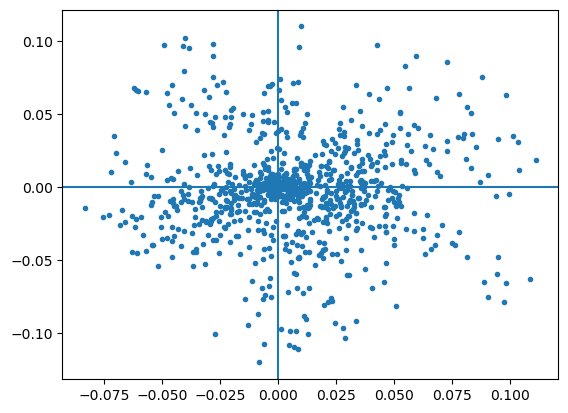

In [8]:
import matplotlib.pyplot as plt

plt.scatter(pc.loadings.iloc[:,1], pc.loadings.iloc[:,2], marker='.')
plt.axhline()
plt.axvline()

In [60]:
colormap = np.array(['red','green'])
wins = pc.scores[y_train != 0]
loss = pc.scores[y_train != 1]


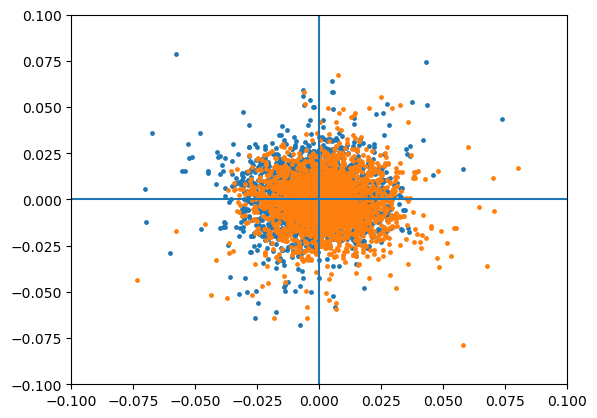

In [70]:
plt.scatter(wins.iloc[:,0], wins.iloc[:,2], marker='o', s=6)
plt.scatter(loss.iloc[:,0], loss.iloc[:,2], marker='o', s=6)
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
plt.axhline()
plt.axvline()

Welp, variance within the first few components were so low so yea